In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

df = pd.read_csv('recommendations_with_score.csv')
average_scores = df.groupby('user_id')['recommendation_credibility'].mean().reset_index() #average recommendation credibility

print(average_scores)

<ipython-input-9-7d30d0b0e076>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('recommendations_with_score.csv')


           user_id  recommendation_credibility
0              2.0                    0.020939
1             10.0                    0.049943
2             58.0                    0.012811
3            171.0                    0.072014
4            196.0                    0.021501
...            ...                         ...
312754  14305762.0                    0.030503
312755  14305769.0                    0.102393
312756  14305844.0                    0.051269
312757  14305966.0                    0.004067
312758  14306002.0                    0.031585

[312759 rows x 2 columns]


In [ ]:
user_df = pd.read_csv('users.csv')

# Merging the user_df DataFrame with the average_sercores DataFrame
merged_df = pd.merge(user_df, average_scores, on='user_id', how='left')

merged_df['recommendation_credibility'].fillna(0, inplace=True)

merged_df.rename(columns={'recommendation_credibility': 'average_recommendation_credibility'}, inplace=True)



In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Assuming merged_df is your DataFrame and it's already defined
# Define your weights for reviews, products, and recommendation credibility
weight_reviews = 0.3
weight_games = 0.4
weight_recommendation_credibility = 0.3

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape your data and apply the scaler for each column
merged_df['reviews_scaled'] = scaler.fit_transform(merged_df[['reviews']])
merged_df['products_scaled'] = scaler.fit_transform(merged_df[['products']])
merged_df['average_recommendation_credibility_scaled'] = scaler.fit_transform(merged_df[['average_recommendation_credibility']])
# Calculate the credibility score using your weights and the scaled columns
merged_df['user_credibility'] = (weight_reviews * merged_df['reviews_scaled'] +
                                  weight_games * merged_df['products_scaled'] +
                                  weight_recommendation_credibility * merged_df['average_recommendation_credibility_scaled'])



merged_df['user_credibility_log'] = np.log(merged_df['user_credibility']+1)

# Save the modified dataframe to the same CSV file
merged_df.to_csv('users_with_score.csv', index=False)


In [ ]:
merged_df

,user_id,products,reviews,average_recommendation_credibility,reviews_scaled,products_scaled,average_recommendation_credibility_scaled,user_credibility,user_credibility_log
0,7360263,359.0,0.0,0.0,0.000000,0.012066,0.0,0.004827,0.004815
1,14020781,156.0,1.0,0.0,0.000410,0.005243,0.0,0.002220,0.002218
2,8762579,329.0,4.0,0.0,0.001641,0.011058,0.0,0.004916,0.004904
3,4820647,176.0,4.0,0.0,0.001641,0.005916,0.0,0.002859,0.002855
4,5167327,98.0,2.0,0.0,0.000821,0.003294,0.0,0.001564,0.001563
...,...,...,...,...,...,...,...,...,...
3340063,11076406,40.0,2.0,0.0,0.000821,0.001344,0.0,0.000784,0.000784
3340064,11076483,27.0,1.0,0.0,0.000410,0.000908,0.0,0.000486,0.000486
3340065,11076691,29.0,1.0,0.0,0.000410,0.000975,0.0,0.000513,0.000513
3340066,11076824,8.0,1.0,0.0,0.000410,0.000269,0.0,0.000231,0.000231


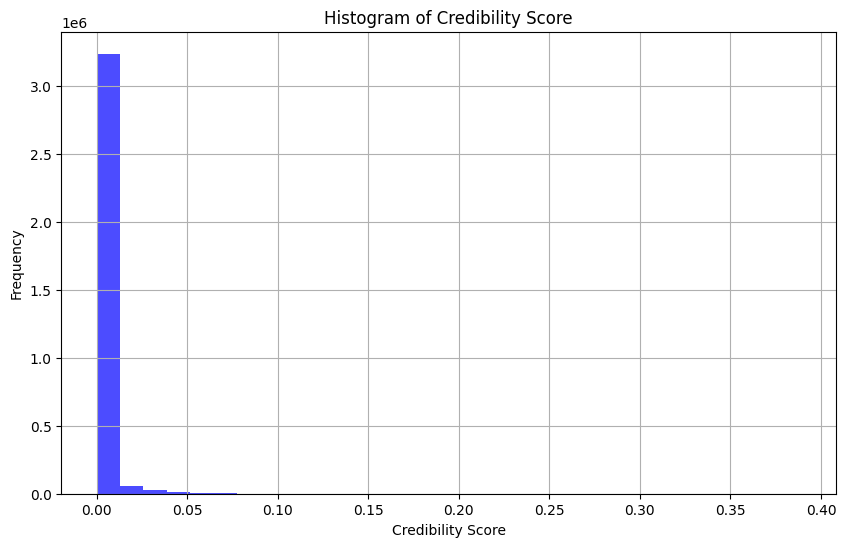

In [ ]:
import matplotlib.pyplot as plt
# Plotting the histogram of the credibility score
plt.figure(figsize=(10, 6))
plt.hist(merged_df['user_credibility_log'], bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Credibility Score')
plt.xlabel('Credibility Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()